In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [70]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [73]:
def adx(data,time=[]):
    for adx in time:
        data["adx_"+str(adx)]=ta.ADX(data.high,data.low,data.close,timeperiod=adx)
        data["di-_"+str(adx)]=ta.MINUS_DI(data.high,data.low,data.close,timeperiod=adx)
        data["di+_"+str(adx)]=ta.PLUS_DI(data.high,data.low,data.close,timeperiod=adx)
        # sinais - trend
        data["dmi_s"+str(adx)]=np.where(data["di+_"+str(adx)]>data["di-_"+str(adx)],1,-1)
    return data

In [74]:
df=adx(data,time=[7,14,21])
df.tail(3)

,open,high,low,close,volume,adx_7,di-_7,di+_7,dmi_s7,dmi_ss7,adx_14,di-_14,di+_14,dmi_s14,dmi_ss14,adx_21,di-_21,di+_21,dmi_s21,dmi_ss21
datetime,,,,,,,,,,,,,,,,,,,,
2018-10-21,6490.60,6557.39,6474.47,6509.87,1.052839e+08,43.276057,12.830465,41.082614,1,0,21.856439,16.736847,35.921701,1,0,13.924995,18.642188,31.665370,1,0
2018-10-22,6509.87,6531.23,6460.38,6483.23,2.027669e+08,44.081031,13.252289,38.626814,1,0,22.794819,16.823311,34.935758,1,0,14.453739,18.663443,31.124733,1,0
2018-10-23,6484.32,6490.71,6450.55,6450.55,1.040892e+08,44.381511,13.679141,37.157931,1,0,23.590373,16.949434,34.360070,1,0,14.927709,18.721925,30.811636,1,0


In [40]:
# Candlestick graph
def candle_graph_adx(data,nome_coluna_datas="datetime",n=200):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax3 = plt.subplot2grid((6,1), (5, 0),rowspan=3)
    ax1.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    ax2.plot(ohlc[nome_coluna_datas], ohlc["adx_14"], color = 'green', lw=1,label="adx_14")
    ax2.plot(ohlc[nome_coluna_datas], ohlc["adx_21"], color = 'black', lw=1,label="adx_21")
    ax2.axes.get_xaxis().set_visible(False)
    plt.ylim(0,100)
    #
    ax3.plot(ohlc[nome_coluna_datas], ohlc["di+_21"], color = 'green', lw=1,label="di+_21")
    ax3.plot(ohlc[nome_coluna_datas], ohlc["di-_21"], color = 'blue', lw=1,label="di-_21")
    plt.ylim(0,50)
    import matplotlib.ticker as ticker
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax1.legend(label="closed")
    ax2.legend(loc=1,fontsize=8)
    ax3.legend(loc=1,fontsize=8)
    return plt.show()

## Exemplo:

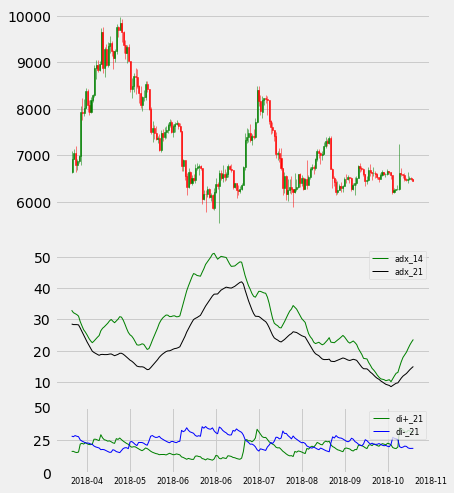

In [41]:
candle_graph_adx(df)